In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#! pip install imblearn
#! pip install scikit-learn==1.2.2
import warnings
warnings.filterwarnings("ignore")

### 1.Import Data

In [4]:
df=pd.read_csv('Synthetic-Infant-Health-Data.csv')
df.head(4)

,Unnamed: 0,BirthAsphyxia,HypDistrib,HypoxiaInO2,CO2,ChestXray,Grunting,LVHreport,LowerBodyO2,RUQO2,...,XrayReport,Disease,GruntingReport,Age,LVH,DuctFlow,CardiacMixing,LungParench,LungFlow,Sick
0,0,no,Equal,Severe,Normal,Normal,yes,no,5-12,<5,...,Asy/Patchy,TGA,no,4-10_days,no,Lt_to_Rt,Transp.,Normal,Normal,no
1,1,no,Equal,Moderate,High,Grd_Glass,no,no,<5,5-12,...,Grd_Glass,Fallot,no,0-3_days,no,Rt_to_Lt,Mild,Abnormal,High,no
2,2,no,Equal,Severe,Normal,Plethoric,no,yes,5-12,5-12,...,Normal,PFC,no,0-3_days,no,Lt_to_Rt,Complete,Normal,High,no
3,3,no,Equal,Moderate,Normal,Plethoric,no,no,5-12,<5,...,Plethoric,PAIVS,no,0-3_days,no,NaN,Complete,Normal,Low,no


In [6]:
df=df.drop(columns='Unnamed: 0')
df.head(4)

,BirthAsphyxia,HypDistrib,HypoxiaInO2,CO2,ChestXray,Grunting,LVHreport,LowerBodyO2,RUQO2,CO2Report,XrayReport,Disease,GruntingReport,Age,LVH,DuctFlow,CardiacMixing,LungParench,LungFlow,Sick
0,no,Equal,Severe,Normal,Normal,yes,no,5-12,<5,<7.5,Asy/Patchy,TGA,no,4-10_days,no,Lt_to_Rt,Transp.,Normal,Normal,no
1,no,Equal,Moderate,High,Grd_Glass,no,no,<5,5-12,>=7.5,Grd_Glass,Fallot,no,0-3_days,no,Rt_to_Lt,Mild,Abnormal,High,no
2,no,Equal,Severe,Normal,Plethoric,no,yes,5-12,5-12,>=7.5,Normal,PFC,no,0-3_days,no,Lt_to_Rt,Complete,Normal,High,no
3,no,Equal,Moderate,Normal,Plethoric,no,no,5-12,<5,<7.5,Plethoric,PAIVS,no,0-3_days,no,NaN,Complete,Normal,Low,no


In [8]:
df.columns


Index(['BirthAsphyxia', 'HypDistrib', 'HypoxiaInO2', 'CO2', 'ChestXray',
       'Grunting', 'LVHreport', 'LowerBodyO2', 'RUQO2', 'CO2Report',
       'XrayReport', 'Disease', 'GruntingReport', 'Age', 'LVH', 'DuctFlow',
       'CardiacMixing', 'LungParench', 'LungFlow', 'Sick'],
      dtype='object')

In [10]:
df.dtypes

BirthAsphyxia     object
HypDistrib        object
HypoxiaInO2       object
CO2               object
ChestXray         object
Grunting          object
LVHreport         object
LowerBodyO2       object
RUQO2             object
CO2Report         object
XrayReport        object
Disease           object
GruntingReport    object
Age               object
LVH               object
DuctFlow          object
CardiacMixing     object
LungParench       object
LungFlow          object
Sick              object
dtype: object

### 2.Data Cleaning/Missing values

In [13]:
df.isnull().sum()

BirthAsphyxia        0
HypDistrib           0
HypoxiaInO2          0
CO2                  0
ChestXray            0
Grunting             0
LVHreport            0
LowerBodyO2          0
RUQO2                0
CO2Report            0
XrayReport           0
Disease              0
GruntingReport       0
Age                  0
LVH                  0
DuctFlow          5689
CardiacMixing      727
LungParench          0
LungFlow             0
Sick                 0
dtype: int64

In [15]:
df.dropna(axis=0, how='any', subset=None, inplace=True)
df.isnull().sum()

BirthAsphyxia     0
HypDistrib        0
HypoxiaInO2       0
CO2               0
ChestXray         0
Grunting          0
LVHreport         0
LowerBodyO2       0
RUQO2             0
CO2Report         0
XrayReport        0
Disease           0
GruntingReport    0
Age               0
LVH               0
DuctFlow          0
CardiacMixing     0
LungParench       0
LungFlow          0
Sick              0
dtype: int64

In [17]:
df.isnull()

,BirthAsphyxia,HypDistrib,HypoxiaInO2,CO2,ChestXray,Grunting,LVHreport,LowerBodyO2,RUQO2,CO2Report,XrayReport,Disease,GruntingReport,Age,LVH,DuctFlow,CardiacMixing,LungParench,LungFlow,Sick
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14990,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
14991,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
14993,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
14995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [19]:
df.shape

(8967, 20)

### Seperate Input and output Variables

In [22]:
x=df.drop('Sick',axis=1)
y=df['Sick']

In [24]:
x.shape

(8967, 19)

In [26]:
y.shape

(8967,)

In [28]:
x['HypDistrib'].value_counts()

HypDistrib
Equal      8776
Unequal     191
Name: count, dtype: int64

In [30]:
x['HypoxiaInO2'].value_counts()

HypoxiaInO2
Moderate    5075
Severe      3348
Mild         544
Name: count, dtype: int64

In [32]:
x['CO2'].value_counts()

CO2
Normal    7304
High      1237
Low        426
Name: count, dtype: int64

In [34]:
x['ChestXray'].value_counts()

ChestXray
Oligaemic    3146
Normal       2677
Plethoric    2047
Asy/Patch     620
Grd_Glass     477
Name: count, dtype: int64

In [36]:
x['Grunting'].value_counts()

Grunting
no     7971
yes     996
Name: count, dtype: int64

In [38]:
x['LVHreport'].value_counts()

LVHreport
no     6819
yes    2148
Name: count, dtype: int64

In [40]:
x['LowerBodyO2'].value_counts()
x['RUQO2'].value_counts()

RUQO2
5-12    4384
<5      3720
12+      863
Name: count, dtype: int64

In [22]:
x['CO2Report'].value_counts()

CO2Report
<7.5     7535
>=7.5    1432
Name: count, dtype: int64

In [23]:
x['XrayReport'].value_counts()

XrayReport
Normal        2985
Oligaemic     2476
Plethoric     2217
Asy/Patchy     818
Grd_Glass      471
Name: count, dtype: int64

In [24]:
x['Disease'].value_counts()

Disease
Fallot    3512
PAIVS     2276
TGA       2061
TAPVD      560
Lung       312
PFC        246
Name: count, dtype: int64

In [25]:
x['GruntingReport'].value_counts()

GruntingReport
no     7587
yes    1380
Name: count, dtype: int64

In [26]:
x['Age'].value_counts()

Age
0-3_days      6244
4-10_days     1647
11-30_days    1076
Name: count, dtype: int64

In [27]:
x['LVH'].value_counts()

LVH
no     6855
yes    2112
Name: count, dtype: int64

In [28]:
x['DuctFlow'].value_counts()

DuctFlow
Lt_to_Rt    8105
Rt_to_Lt     862
Name: count, dtype: int64

In [29]:
x['CardiacMixing'].value_counts()

CardiacMixing
Complete    5997
Transp.     2516
Mild         454
Name: count, dtype: int64

In [30]:
x['LungParench'].value_counts()

LungParench
Normal       7420
Abnormal     1146
Congested     401
Name: count, dtype: int64

In [31]:
x['LungFlow'].value_counts()

LungFlow
Low       5067
High      3046
Normal     854
Name: count, dtype: int64

### Label Encoading

In [44]:
from sklearn import preprocessing

In [46]:
x=x.apply(preprocessing.LabelEncoder().fit_transform)
x
y=y.replace({'no':0,'yes':1})
y

0        0
1        0
2        0
4        1
6        0
        ..
14990    0
14991    0
14993    0
14995    0
14996    1
Name: Sick, Length: 8967, dtype: int64

In [35]:
x['BirthAsphyxia'].value_counts

<bound method IndexOpsMixin.value_counts of 0        0
1        0
2        0
4        0
6        1
        ..
14990    0
14991    0
14993    0
14995    0
14996    0
Name: BirthAsphyxia, Length: 8967, dtype: int32>

In [36]:
x.dtypes

BirthAsphyxia     int32
HypDistrib        int32
HypoxiaInO2       int32
CO2               int32
ChestXray         int32
Grunting          int32
LVHreport         int32
LowerBodyO2       int32
RUQO2             int32
CO2Report         int32
XrayReport        int32
Disease           int32
GruntingReport    int32
Age               int32
LVH               int32
DuctFlow          int32
CardiacMixing     int32
LungParench       int32
LungFlow          int32
dtype: object

### 3.Exploratory Data Analysis

In [38]:
set(y)

{0, 1}

In [39]:
y.unique()

array([0, 1], dtype=int64)

<Axes: xlabel='Sick', ylabel='count'>

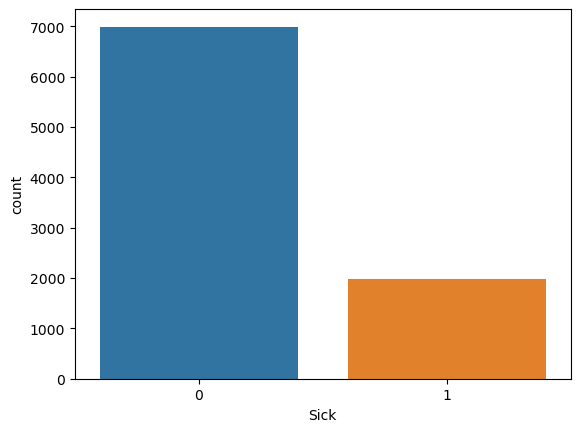

In [40]:
sns.countplot(x=y,palette='tab10')

In [41]:
y.value_counts()

Sick
0    6990
1    1977
Name: count, dtype: int64

### 4. Detect and remove outliers

In [43]:
from sklearn.ensemble import IsolationForest

In [44]:
iso=IsolationForest(random_state=0,contamination=0.05)

In [45]:
clean=iso.fit_predict(x,y)

In [46]:
x_unclean=x[clean==-1]
x_unclean.shape

(449, 19)

In [47]:
x_clean=x[clean==1]
y_clean=y[clean==1]

In [48]:
x_clean.shape,y_clean.shape

((8518, 19), (8518,))

In [49]:
### 5. Data Balancing/Resampling

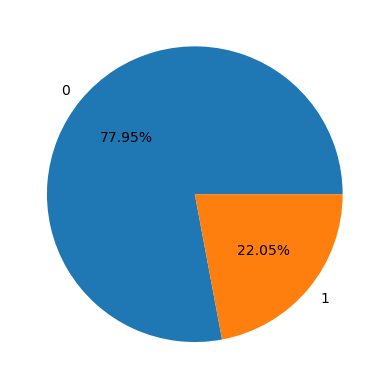

In [50]:
plt.pie(y.value_counts(),labels=y.value_counts().index,autopct='%2.2f%%');

In [51]:
from imblearn.over_sampling import RandomOverSampler

In [52]:
sampler=RandomOverSampler(random_state=0)

In [53]:
x_result,y_result=sampler.fit_resample(x_clean,y_clean)

In [54]:
x_result.shape

(13348, 19)

In [55]:
y_result.shape

(13348,)

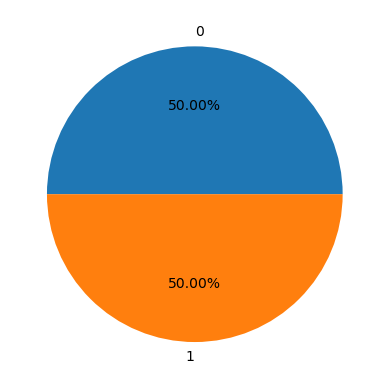

In [56]:
plt.pie(y_result.value_counts(),labels=y_result.value_counts().index,autopct='%2.2f%%');

### 6.Feature Selection/Dimentionality Reduction

In [58]:
from sklearn.feature_selection import SelectKBest,chi2

In [59]:
select=SelectKBest(score_func=chi2,k=15)

In [60]:
select.fit(x,y)

SelectKBest(k=15, score_func=<function chi2 at 0x000002380F083100>)

In [61]:
select.get_support()

array([False,  True, False,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True])

In [62]:
x=x_result.iloc[:,select.get_support()]

In [63]:
x

,HypDistrib,CO2,ChestXray,Grunting,LVHreport,LowerBodyO2,CO2Report,XrayReport,Disease,GruntingReport,Age,DuctFlow,CardiacMixing,LungParench,LungFlow
0,0,2,2,1,0,1,0,0,5,0,2,0,2,2,2
1,0,0,1,0,0,2,1,1,0,0,0,1,1,0,0
2,0,2,4,0,1,1,1,2,3,0,0,0,0,2,0
3,0,2,4,0,1,0,0,4,2,0,0,0,0,2,2
4,0,2,4,0,0,1,0,1,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13343,0,2,0,0,0,2,0,0,0,0,0,0,0,2,0
13344,0,2,2,1,0,1,0,2,0,0,0,0,0,2,1
13345,0,2,4,0,0,2,0,4,5,0,0,0,0,2,0
13346,0,2,4,1,0,2,1,4,2,0,0,0,2,2,0


### 7.Cross Validation

In [65]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y_result,test_size=.25,
                                               random_state=0)#train_size by default 0.25

In [66]:
x_test.shape

(3337, 15)

In [67]:
x_train.shape

(10011, 15)

### 8.Algorithm Hyperparameter Tuning

### 1.DecisionTree

In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve

In [71]:
dt=DecisionTreeClassifier(random_state=0)

In [72]:
params={
    'criterion':["gini","entropy","log_loss"],
    'splitter':["best","random"],
    'random_state':[0,1,2,3,4]
}

In [73]:
grid=GridSearchCV(dt,param_grid=params,cv=5)

In [74]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'random_state': [0, 1, 2, 3, 4],
                         'splitter': ['best', 'random']})

In [75]:
grid.best_estimator_

DecisionTreeClassifier(random_state=4, splitter='random')

### Model Building

In [77]:
classifier=grid.best_estimator_

### Performance Monitoring

In [79]:
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [80]:
y_pred_train = classifier.predict(x_train)    
y_pred_test = classifier.predict(x_test) 

The TRAIN accuracy is 0.9012086704624913
The ROC score for TRAIN data is 0.9012361377824619


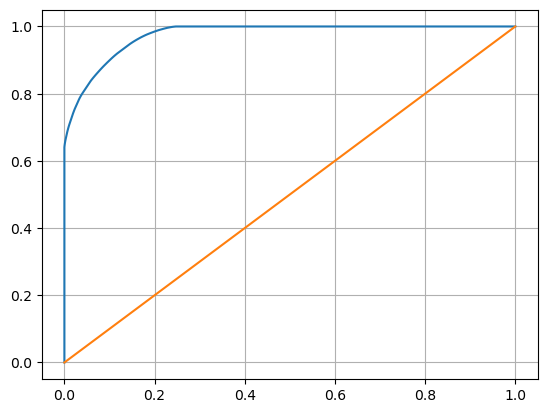

----------------------------------------------------------------------------------------------------
The TEST accuracy is 0.7713515133353311
The ROC score for TEST data is 0.7709737570747702


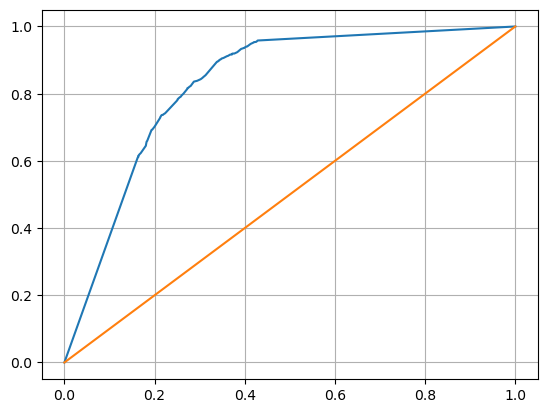

In [81]:
    print("The TRAIN accuracy is",accuracy_score(y_train,y_pred_train))    
    print("The ROC score for TRAIN data is",roc_auc_score(y_train,y_pred_train))
    fpr,tpr,thresholds = roc_curve(y_train,classifier.predict_proba(x_train)[:,1])    
    plt.plot(fpr,tpr)    
    plt.plot([0,1],[0,1])    
    plt.grid()    
    plt.show()
    print("--"*50)    
    print("The TEST accuracy is",accuracy_score(y_test,y_pred_test))    
    print("The ROC score for TEST data is",roc_auc_score(y_test,y_pred_test))    
    fpr,tpr,thresholds = roc_curve(y_test,classifier.predict_proba(x_test)[:,1])    
    plt.plot(fpr,tpr)    
    plt.plot([0,1],[0,1])    
    plt.grid()    
    plt.show()

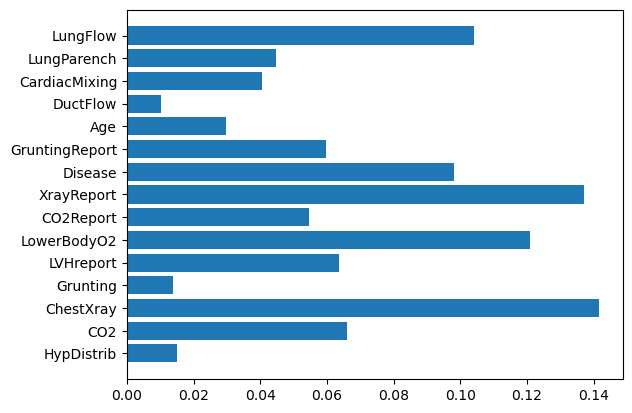

In [82]:
plt.barh(x_train.columns,classifier.fit(x_train,y_train).feature_importances_)
plt.show()

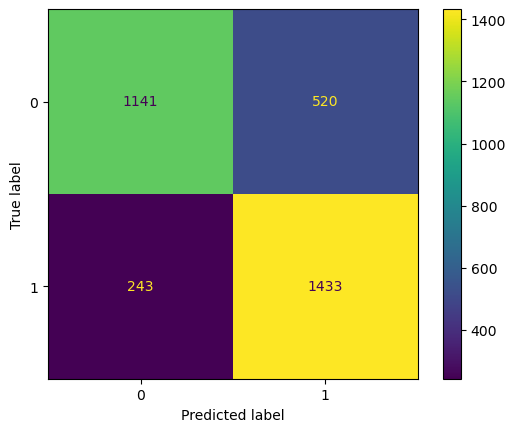

In [83]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_test)

### 2.AdaBoostClassifier base as Decision Tree Classifier

In [85]:
from sklearn.ensemble import AdaBoostClassifier

In [86]:
ada=AdaBoostClassifier(base_estimator=dt)

In [87]:
 parameters = {
    'n_estimators' : [50, 70, 90, 120, 180, 200],
    'learning_rate' : [0.001, 0.01, 0.1, 1, 10]
}

In [88]:
grid= GridSearchCV(ada, param_grid=parameters,cv = 5)

In [89]:
grid.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=0)),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'n_estimators': [50, 70, 90, 120, 180, 200]})

In [90]:
grid.best_estimator_

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=0),
                   learning_rate=1, n_estimators=200)

### Model Building

In [94]:
booster=grid.best_estimator_

### Performance Monitoring

In [96]:
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [97]:
y_pred_train = booster.predict(x_train)    
y_pred_test = booster.predict(x_test) 

The TRAIN accuracy is 0.9012086704624913
The ROC score for TRAIN data is 0.9012588877561797


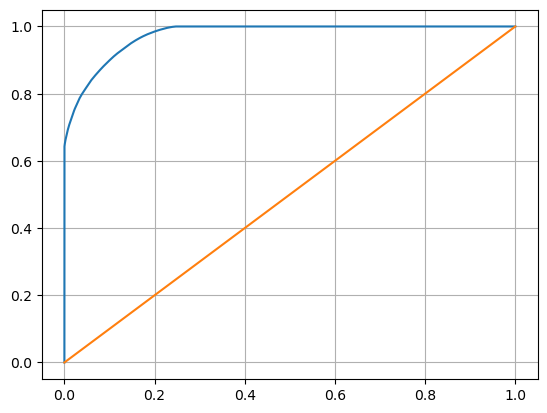

----------------------------------------------------------------------------------------------------
The TEST accuracy is 0.8085106382978723
The ROC score for TEST data is 0.8082306213440733


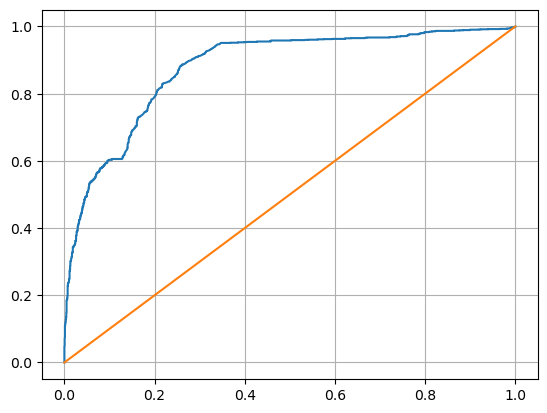

In [98]:
    print("The TRAIN accuracy is",accuracy_score(y_train,y_pred_train))    
    print("The ROC score for TRAIN data is",roc_auc_score(y_train,y_pred_train))
    fpr,tpr,thresholds = roc_curve(y_train,booster.predict_proba(x_train)[:,1])    
    plt.plot(fpr,tpr)    
    plt.plot([0,1],[0,1])    
    plt.grid()    
    plt.show()
    print("--"*50)    
    print("The TEST accuracy is",accuracy_score(y_test,y_pred_test))    
    print("The ROC score for TEST data is",roc_auc_score(y_test,y_pred_test))    
    fpr,tpr,thresholds = roc_curve(y_test,booster.predict_proba(x_test)[:,1])    
    plt.plot(fpr,tpr)    
    plt.plot([0,1],[0,1])    
    plt.grid()    
    plt.show()

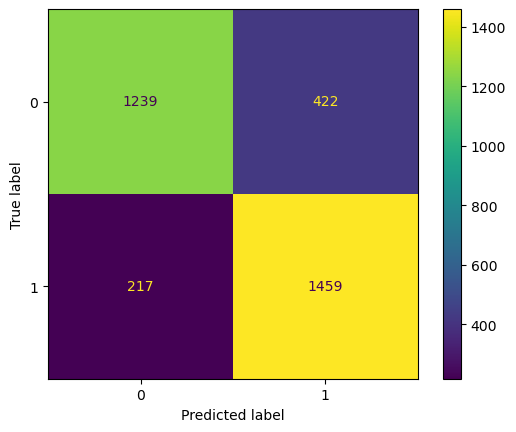

In [99]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_test)

### 3.Random Forest Classifier

In [101]:
from sklearn.ensemble import RandomForestClassifier

In [102]:
random=RandomForestClassifier(random_state=5,n_estimators=10)#no of decision tree we  going to use

In [103]:
params={
    'criterion':["gini","entropy","log_loss"],
    'n_estimators' : [12,10,100]
}

In [104]:
grid=GridSearchCV(random,param_grid=params,cv=3)

In [105]:
grid.fit(x_train,y_train)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(n_estimators=10, random_state=5),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'n_estimators': [12, 10, 100]})

In [106]:
grid.best_estimator_

RandomForestClassifier(random_state=5)

### Model Building

In [108]:
rf=grid.best_estimator_

y_pred_train = rf.predict(x_train)    
y_pred_test = rf.predict(x_test) 

### Performance Monitoring

The TRAIN accuracy is 0.9012086704624913
The ROC score for TRAIN data is 0.9012588877561797


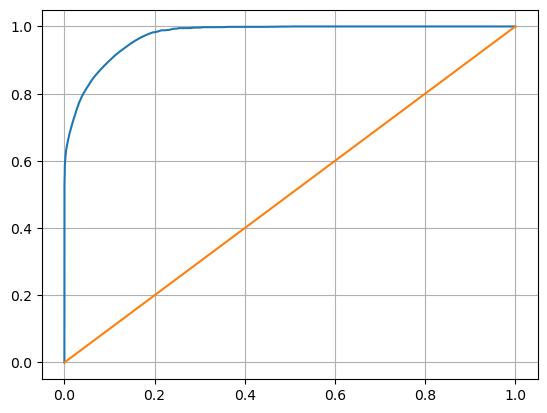

----------------------------------------------------------------------------------------------------
The TEST accuracy is 0.7989211866946359
The ROC score for TEST data is 0.7985843993683537


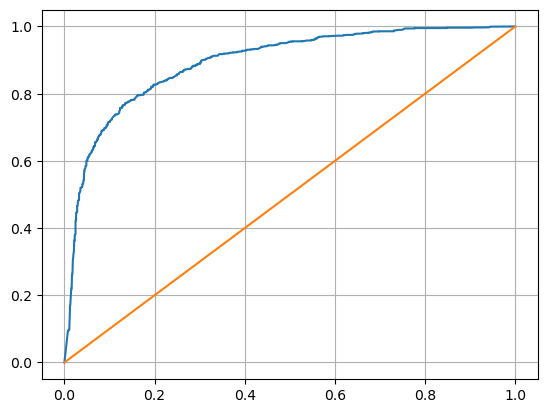

In [110]:
    print("The TRAIN accuracy is",accuracy_score(y_train,y_pred_train))    
    print("The ROC score for TRAIN data is",roc_auc_score(y_train,y_pred_train))
    fpr,tpr,thresholds = roc_curve(y_train,rf.predict_proba(x_train)[:,1])    
    plt.plot(fpr,tpr)    
    plt.plot([0,1],[0,1])    
    plt.grid()    
    plt.show()
    print("--"*50)    
    print("The TEST accuracy is",accuracy_score(y_test,y_pred_test))    
    print("The ROC score for TEST data is",roc_auc_score(y_test,y_pred_test))    
    fpr,tpr,thresholds = roc_curve(y_test,rf.predict_proba(x_test)[:,1])    
    plt.plot(fpr,tpr)    
    plt.plot([0,1],[0,1])    
    plt.grid()    
    plt.show()

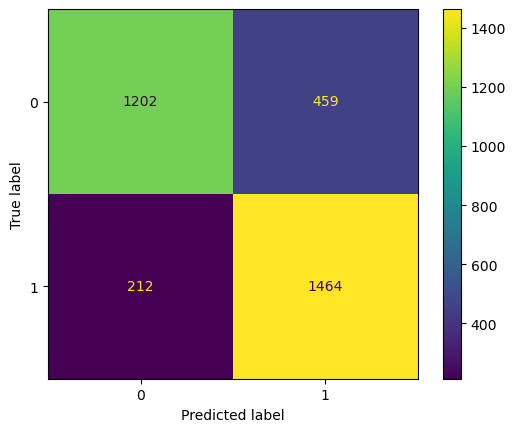

In [111]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_test)

### 4.GaussianNB

In [113]:
from sklearn.naive_bayes import GaussianNB

In [114]:
nb=GaussianNB()

In [115]:
params={
    'priors':[None],
    'var_smoothing' : [1e-2, 1e-3, 1e-4]
}

In [116]:
grid=GridSearchCV(nb,param_grid=params,cv=4)

In [117]:
grid.fit(x_train,y_train)

GridSearchCV(cv=4, estimator=GaussianNB(),
             param_grid={'priors': [None],
                         'var_smoothing': [0.01, 0.001, 0.0001]})

In [118]:
grid.best_estimator_

GaussianNB(var_smoothing=0.01)

### Model Building

In [120]:
gn=grid.best_estimator_

In [121]:
y_pred_train = gn.predict(x_train)    
y_pred_test = gn.predict(x_test) 

### Performance Monitoring

The TRAIN accuracy is 0.5552891818999101
The ROC score for TRAIN data is 0.555012489735571


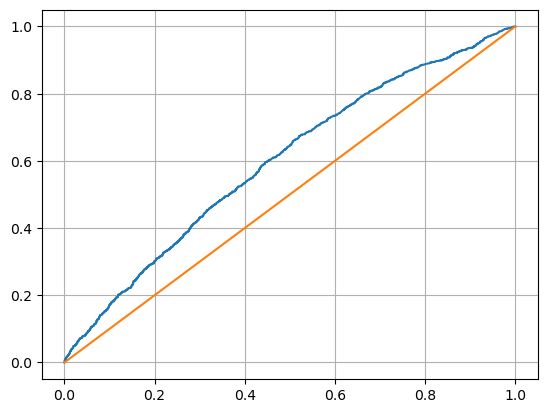

----------------------------------------------------------------------------------------------------
The TEST accuracy is 0.5537908300869044
The ROC score for TEST data is 0.5546183395860963


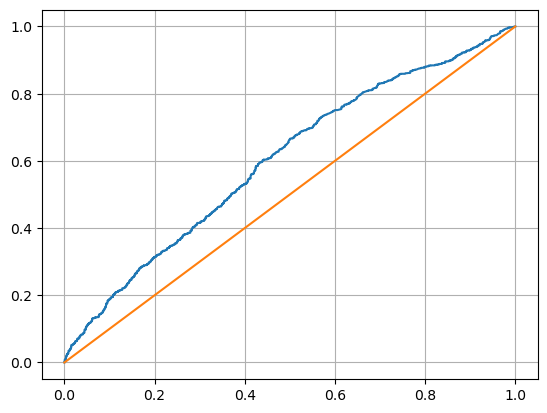

In [123]:
    print("The TRAIN accuracy is",accuracy_score(y_train,y_pred_train))    
    print("The ROC score for TRAIN data is",roc_auc_score(y_train,y_pred_train))
    fpr,tpr,thresholds = roc_curve(y_train,gn.predict_proba(x_train)[:,1])    
    plt.plot(fpr,tpr)    
    plt.plot([0,1],[0,1])    
    plt.grid()    
    plt.show()
    print("--"*50)    
    print("The TEST accuracy is",accuracy_score(y_test,y_pred_test))    
    print("The ROC score for TEST data is",roc_auc_score(y_test,y_pred_test))    
    fpr,tpr,thresholds = roc_curve(y_test,gn.predict_proba(x_test)[:,1])    
    plt.plot(fpr,tpr)    
    plt.plot([0,1],[0,1])    
    plt.grid()    
    plt.show()

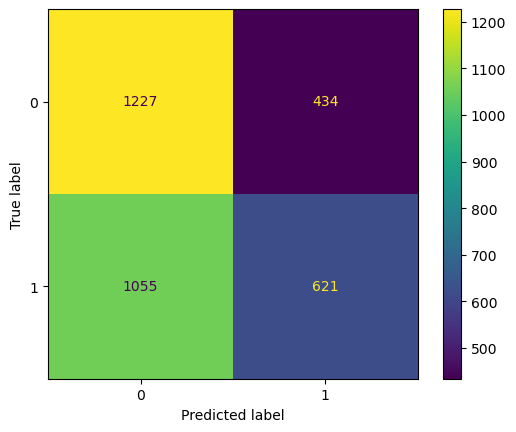

In [124]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_test)

### 5.AdaBoostClassifier base as Random Forest Classifier

In [126]:
from sklearn.ensemble import AdaBoostClassifier

In [127]:
ada=AdaBoostClassifier(base_estimator=random)

In [128]:
parameters = {
    'n_estimators' : [50, 70, 90, 120, 180, 200],
    'learning_rate' : [0.001, 0.01, 0.1, 1, 10]
}

In [129]:
grid= GridSearchCV(ada, param_grid=parameters,cv = 5)

In [130]:
grid.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=10,
                                                                                random_state=5)),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'n_estimators': [50, 70, 90, 120, 180, 200]})

In [131]:
grid.best_estimator_

AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=10,
                                                         random_state=5),
                   learning_rate=1, n_estimators=90)

In [132]:
rb=grid.best_estimator_

In [133]:
y_pred_train = rb.predict(x_train)    
y_pred_test = rb.predict(x_test) 

### Performance Monitoring

The TRAIN accuracy is 0.9008091099790231
The ROC score for TRAIN data is 0.9008563329580784


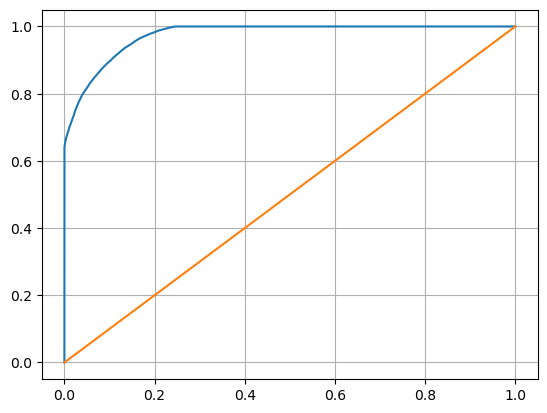

----------------------------------------------------------------------------------------------------
The TEST accuracy is 0.8097093197482769
The ROC score for TEST data is 0.8094481858845133


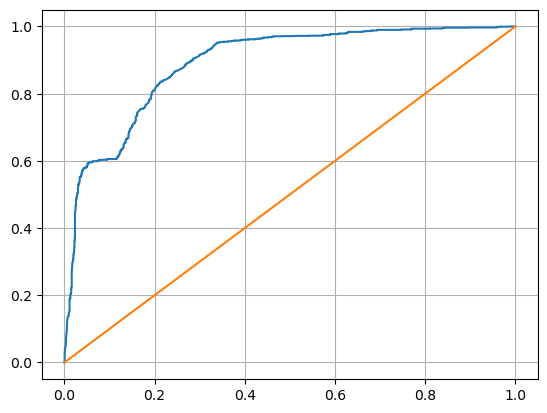

In [135]:
    print("The TRAIN accuracy is",accuracy_score(y_train,y_pred_train))    
    print("The ROC score for TRAIN data is",roc_auc_score(y_train,y_pred_train))
    fpr,tpr,thresholds = roc_curve(y_train,rb.predict_proba(x_train)[:,1])    
    plt.plot(fpr,tpr)    
    plt.plot([0,1],[0,1])    
    plt.grid()    
    plt.show()
    print("--"*50)    
    print("The TEST accuracy is",accuracy_score(y_test,y_pred_test))    
    print("The ROC score for TEST data is",roc_auc_score(y_test,y_pred_test))    
    fpr,tpr,thresholds = roc_curve(y_test,rb.predict_proba(x_test)[:,1])    
    plt.plot(fpr,tpr)    
    plt.plot([0,1],[0,1])    
    plt.grid()    
    plt.show()

### 9.Deployment

In [143]:
#Serialization
import joblib
joblib.dump(booster,'classifier.model')

['classifier.model']